In [311]:
# Riley Whalen
# AI in Healthcare
# Self Learning Tutorial 

# Self Learning Tutorial Project 

Goal: Use certain MIMIC data and features to predict stroke

Features Used: 

* Gender
* Age
* Mortality
* Hypertension
* Diabetes
* Blood Pressure (Systolic)
* Blood Pressure (Diastolic)
* Heart Rate
* O2 Saturation
* Glucose
* Cholesterol
* INR





In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Data Exploration & Preparation

In [313]:
# READ IN THE CSV FILE FILLED WITH OUR SELECTED, QUERRIED DATA 
df = pd.read_csv('strokePredictionData3.csv')

In [314]:
print(df.head())

   SUBJECT_ID GENDER    AGE  MORTALITY  STROKE_HISTORY  stroke_history  \
0        7730      F   30.0          1               0               0   
1        6862      F   33.0          1               0               0   
2       19842      F  301.0          0               0               0   
3       19842      F  302.0          0               0               0   
4       22500      F  304.0          0               0               0   

   hypertension  diabetes  bp_systolic  bp_diastolic  heart_rate  \
0             0         0          NaN           NaN         NaN   
1             0         0          NaN           NaN         NaN   
2             0         0          NaN           NaN         NaN   
3             0         0          NaN           NaN         NaN   
4             0         0          NaN           NaN         NaN   

   o2_saturation     glucose  cholesterol       inr  
0            NaN  300.333333          NaN  2.975000  
1            NaN  105.000000          

In [315]:
# PRINT SOME INFO ABOUT THE DATAFRAME THAT SHOWS US THE DATATYPES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53431 entries, 0 to 53430
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUBJECT_ID      53431 non-null  int64  
 1   GENDER          53431 non-null  object 
 2   AGE             53431 non-null  float64
 3   MORTALITY       53431 non-null  int64  
 4   STROKE_HISTORY  53431 non-null  int64  
 5   stroke_history  53431 non-null  int64  
 6   hypertension    53431 non-null  int64  
 7   diabetes        53431 non-null  int64  
 8   bp_systolic     21939 non-null  float64
 9   bp_diastolic    21939 non-null  float64
 10  heart_rate      21943 non-null  float64
 11  o2_saturation   21926 non-null  float64
 12  glucose         45699 non-null  float64
 13  cholesterol     14008 non-null  float64
 14  inr             44664 non-null  float64
dtypes: float64(8), int64(6), object(1)
memory usage: 6.1+ MB


In [316]:
# ENSURE THAT WE HAVE SOME STROKE INSTANCES. THIS DATASET IS VERY IMBALANCED SO WE MAY NEED TO DO SOME EXTRA WORK LATER 
df['STROKE_HISTORY'].value_counts()

STROKE_HISTORY
0    50377
1     3054
Name: count, dtype: int64

In [317]:
print(df.describe())

         SUBJECT_ID           AGE     MORTALITY  STROKE_HISTORY  \
count  53431.000000  53431.000000  53431.000000    53431.000000   
mean   33723.363909     63.972918      0.108795        0.057158   
std    28074.342558     57.744906      0.311384        0.232146   
min        2.000000      0.000000      0.000000        0.000000   
25%    12013.000000     42.000000      0.000000        0.000000   
50%    24116.000000     62.000000      0.000000        0.000000   
75%    53761.000000     76.000000      0.000000        0.000000   
max    99999.000000    311.000000      1.000000        1.000000   

       stroke_history  hypertension  diabetes   bp_systolic  bp_diastolic  \
count         53431.0       53431.0   53431.0  21939.000000  21939.000000   
mean              0.0           0.0       0.0    120.809032     64.119552   
std               0.0           0.0       0.0     38.468691     30.022408   
min               0.0           0.0       0.0     45.416667      0.000000   
25%        

In [318]:
df.head()

,SUBJECT_ID,GENDER,AGE,MORTALITY,STROKE_HISTORY,stroke_history,hypertension,diabetes,bp_systolic,bp_diastolic,heart_rate,o2_saturation,glucose,cholesterol,inr
0,7730,F,30.0,1,0,0,0,0,NaN,NaN,NaN,NaN,300.333333,NaN,2.975000
1,6862,F,33.0,1,0,0,0,0,NaN,NaN,NaN,NaN,105.000000,NaN,1.200000
2,19842,F,301.0,0,0,0,0,0,NaN,NaN,NaN,NaN,120.931034,NaN,1.897297
3,19842,F,302.0,0,0,0,0,0,NaN,NaN,NaN,NaN,120.931034,NaN,1.897297
4,22500,F,304.0,0,0,0,0,0,NaN,NaN,NaN,NaN,109.111111,225.333333,1.081818


In [319]:
# SEE HOW MANY NULL VALUES WE ARE DEALING WITH. CHOLOESTORAL HAS SO MANY NULL VALUES IT MAY BE BENEFICIAL TO GET RID OF THE FEATURE COMPLETELY 
print(df.isnull().sum())

SUBJECT_ID            0
GENDER                0
AGE                   0
MORTALITY             0
STROKE_HISTORY        0
stroke_history        0
hypertension          0
diabetes              0
bp_systolic       31492
bp_diastolic      31492
heart_rate        31488
o2_saturation     31505
glucose            7732
cholesterol       39423
inr                8767
dtype: int64


In [320]:
df.dtypes

SUBJECT_ID          int64
GENDER             object
AGE               float64
MORTALITY           int64
STROKE_HISTORY      int64
stroke_history      int64
hypertension        int64
diabetes            int64
bp_systolic       float64
bp_diastolic      float64
heart_rate        float64
o2_saturation     float64
glucose           float64
cholesterol       float64
inr               float64
dtype: object

In [321]:
# LOOP THROUGH THE COLUMNS THAT WE HAVE TO FILL DUE TO NULL VALUES. FILL ALL WITH THE MEDIAN TO START WITH 
for col in ["bp_systolic", "bp_diastolic", "heart_rate", "o2_saturation", "glucose", "inr"]:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [322]:
# DROP THE CHOLESTEROL COLUMN COMPLETELY 
df.drop(columns=["cholesterol"], inplace=True)

In [323]:
missingVals = df.isnull().sum()

In [324]:
# MAP THE GENDER COLUMN TO BE EITHER A 0 OR A 1 TO GET IT TO BE OF NUMERICAL TYPE 
df["GENDER"] = df["GENDER"].map({"F": 0, "M": 1})

In [325]:
# ENSURE NO MORE NULL VALUES 
print(missingVals)

SUBJECT_ID        0
GENDER            0
AGE               0
MORTALITY         0
STROKE_HISTORY    0
stroke_history    0
hypertension      0
diabetes          0
bp_systolic       0
bp_diastolic      0
heart_rate        0
o2_saturation     0
glucose           0
inr               0
dtype: int64


In [326]:
# No more null values

## Plot some of the features to inspect data distribution

(array([10370., 17233., 23436.,     0.,     0.,     0.,     0.,     0.,
            0.,  2392.]),
 array([  0. ,  31.1,  62.2,  93.3, 124.4, 155.5, 186.6, 217.7, 248.8,
        279.9, 311. ]),
 <BarContainer object of 10 artists>)

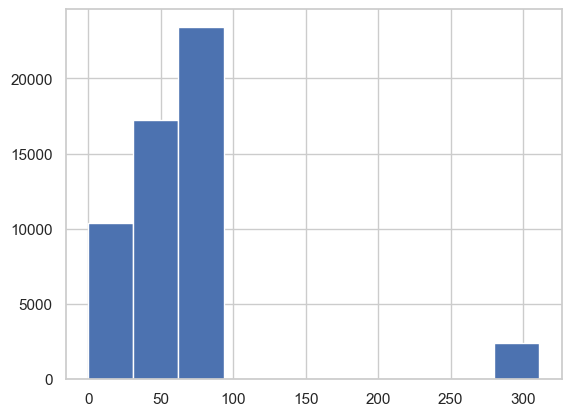

In [327]:
plt.hist(df['AGE'])

In [328]:
# DUE TO OUTLIERS IN THE AGE FEATURE, WE GET RID OF ANYONE WITH AN AGE OVER 100 AND ANYONES WITH AN AGE OF 0 OR LESS IF IT EXISTS
df = df[(df["AGE"] > 0) & (df["AGE"] <= 100)]

(array([  19.,  162., 1604., 1782., 2813., 5580., 7770., 8333., 8642.,
        6461.]),
 array([ 1. ,  9.8, 18.6, 27.4, 36.2, 45. , 53.8, 62.6, 71.4, 80.2, 89. ]),
 <BarContainer object of 10 artists>)

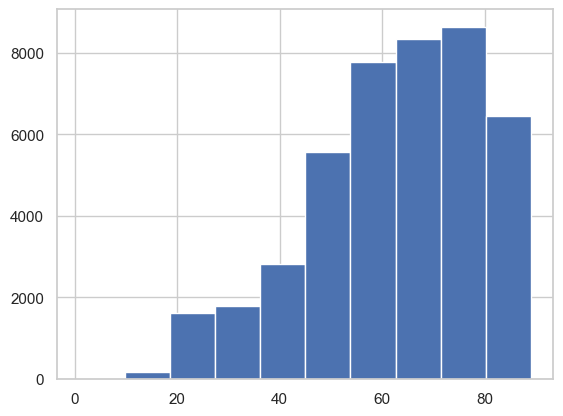

In [329]:
plt.hist(df['AGE'])

In [330]:
df['STROKE_HISTORY'].value_counts()

STROKE_HISTORY
0    40316
1     2850
Name: count, dtype: int64

In [331]:
df.isnull().sum()

SUBJECT_ID        0
GENDER            0
AGE               0
MORTALITY         0
STROKE_HISTORY    0
stroke_history    0
hypertension      0
diabetes          0
bp_systolic       0
bp_diastolic      0
heart_rate        0
o2_saturation     0
glucose           0
inr               0
dtype: int64

In [332]:
df.head()

,SUBJECT_ID,GENDER,AGE,MORTALITY,STROKE_HISTORY,stroke_history,hypertension,diabetes,bp_systolic,bp_diastolic,heart_rate,o2_saturation,glucose,inr
0,7730,0,30.0,1,0,0,0,0,118.478261,61.693182,83.783505,96.915368,300.333333,2.975000
1,6862,0,33.0,1,0,0,0,0,118.478261,61.693182,83.783505,96.915368,105.000000,1.200000
8,88258,0,89.0,1,0,0,0,0,96.848485,28.181818,94.176471,95.862069,185.666667,1.247368
9,3019,0,26.0,1,0,0,0,0,118.478261,61.693182,83.783505,96.915368,132.466102,1.409859
10,3019,0,26.0,0,0,0,0,0,118.478261,61.693182,83.783505,96.915368,132.466102,1.409859


In [333]:
df.dtypes

SUBJECT_ID          int64
GENDER              int64
AGE               float64
MORTALITY           int64
STROKE_HISTORY      int64
stroke_history      int64
hypertension        int64
diabetes            int64
bp_systolic       float64
bp_diastolic      float64
heart_rate        float64
o2_saturation     float64
glucose           float64
inr               float64
dtype: object

## Age Distribution

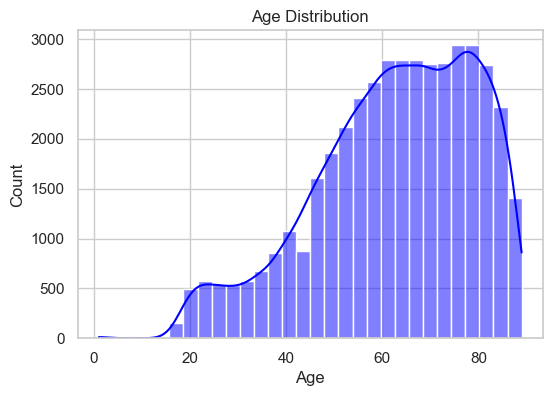

In [334]:
plt.figure(figsize=(6, 4))
sns.histplot(df["AGE"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Blood Pressure Distribution

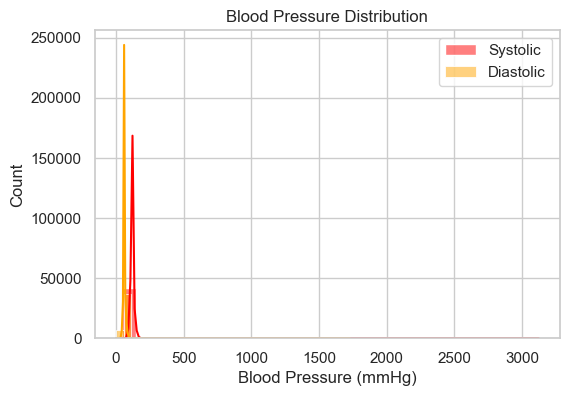

In [335]:
plt.figure(figsize=(6, 4))
sns.histplot(df["bp_systolic"], bins=30, kde=True, color="red", label="Systolic")
sns.histplot(df["bp_diastolic"], bins=30, kde=True, color="orange", label="Diastolic")
plt.title("Blood Pressure Distribution")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.legend()
plt.show()

## Glucose Distribution

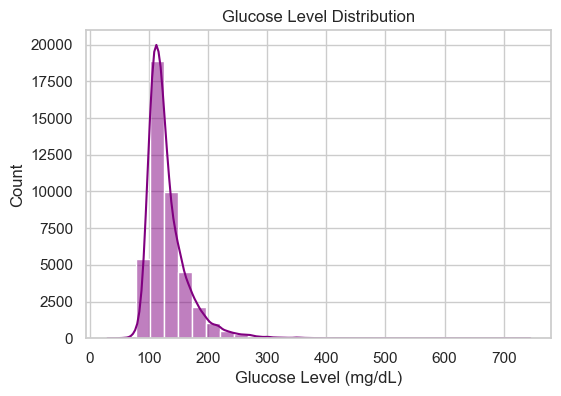

In [336]:
plt.figure(figsize=(6, 4))
sns.histplot(df["glucose"], bins=30, kde=True, color="purple")
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose Level (mg/dL)")
plt.ylabel("Count")
plt.show()

## Correlation Heatmap

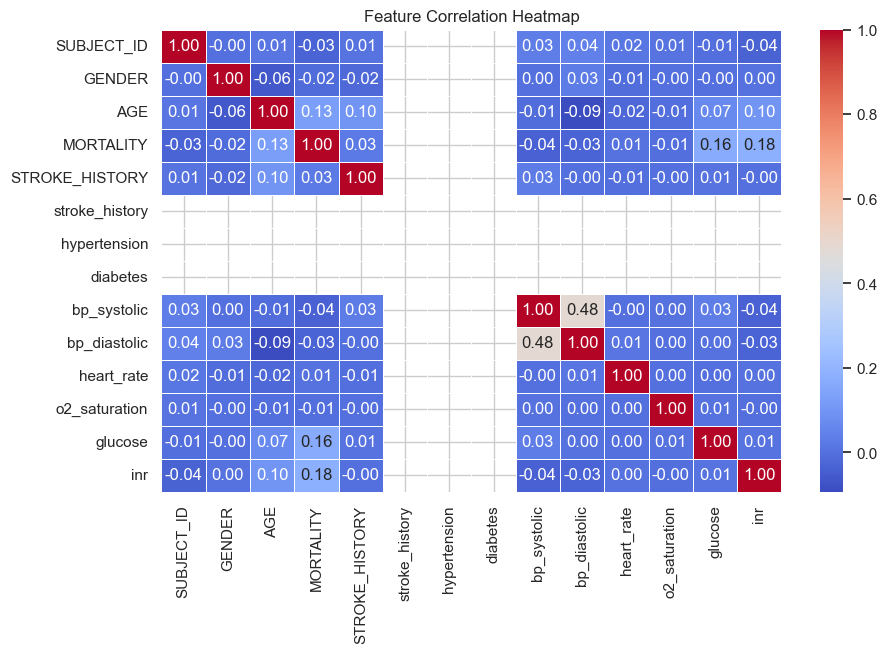

In [337]:
# CORRELATION MATRIX TO CHECK IF ANY NOTABLE CORRELATIONS BETWEEN STROKE HISTROY AND OTHER VARIABLES. THERE DOES NOT APPEAR TO BE ANY NOTABLE CORRELATIONS

plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Part 2: Model

In [349]:
# SPLIT THE DATA INTO FEATURES AND TARGET

X = df.drop(columns=["STROKE_HISTORY", "SUBJECT_ID"])
y = df["STROKE_HISTORY"]

In [339]:
print("Feature Shape: ", X.shape)

Feature Shape:  (43166, 12)


In [340]:
print("Target Shape: ", y.shape)

Target Shape:  (43166,)


In [341]:
# SPLIT DATA INTO TRAINING AND TESTING SPLITS (80% TRAINING, 20% TESTING)

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [342]:
y.value_counts()

STROKE_HISTORY
0    40316
1     2850
Name: count, dtype: int64

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 

from imblearn.over_sampling import SMOTE

# NEED TO USE SMOTE IN ORDER TO BALANCE THE DATASET BETTER SINCE WE HAVE A SEVERE CLASS IMBALANCE AS SEEN IN THE CELL ABOVE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# TRAIN A LOGISTIC REGRESSION MODEL SINCE IT IS A GOOD MODEL TO USE FOR BINARY CLASSIFICATION AS A BASELINE 

model = LogisticRegression(class_weight='balanced', max_iter=500)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

# EVALUATE MODELS PERFORMANCE USING CLASSIFICATION REPORT AND RELEVANT METRICS
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.644660643965717
Precision: 0.0870712401055409
Recall: 0.46808510638297873
F1 Score: 0.1468298109010011

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.66      0.78      8070
           1       0.09      0.47      0.15       564

    accuracy                           0.64      8634
   macro avg       0.52      0.56      0.46      8634
weighted avg       0.89      0.64      0.73      8634



In [ ]:
# MODEL DID NOT PERFORM GREAT. 64% RAW ACCURACY. NEED TO TRY TO IMPROVE UPON THIS.

In [344]:
from sklearn.ensemble import RandomForestClassifier

# ATTEMPT A RANDOM FOREST CLASSIFIER TO ACHIEVE A BETTER SCORE. STILL USING THE RESAMPLED SMOTE DATA THAT WE USED TO BALANCE THE DATA WITH STROKE AND NO STROKE HISTORY 

model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8858003242992819
Precision: 0.21866666666666668
Recall: 0.2907801418439716
F1 Score: 0.2496194824961948

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      8070
           1       0.22      0.29      0.25       564

    accuracy                           0.89      8634
   macro avg       0.58      0.61      0.59      8634
weighted avg       0.90      0.89      0.89      8634



In [345]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_


In [346]:
print(best_model)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)


In [347]:
ypred = best_model.predict(X_test)

In [348]:


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8858003242992819
Precision: 0.21866666666666668
Recall: 0.2907801418439716
F1 Score: 0.2496194824961948

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      8070
           1       0.22      0.29      0.25       564

    accuracy                           0.89      8634
   macro avg       0.58      0.61      0.59      8634
weighted avg       0.90      0.89      0.89      8634

